**Link to the dataset:**:[https://www.kaggle.com/harunshimanto/epileptic-seizure-recognition](https://www.kaggle.com/harunshimanto/epileptic-seizure-recognition)

# Importing the libraries

In [264]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

# Load the Dataset

In [265]:
ESR = pd.read_csv('Epileptic Seizure Recognition.csv')
ESR.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


# Read and Show Dataset
* The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds.

* The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds.

* We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time.

* So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

* The response variable is y in column 179, the Explanatory variables X1, X2, ..., X178

The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


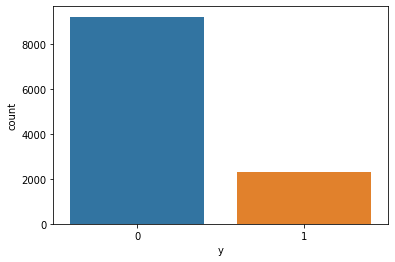

In [266]:
cols = ESR.columns
tgt = ESR.y
tgt.unique()
tgt[tgt>1]=0
ax = sn.countplot(tgt,label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)


As we can see, there are 178 EEG features and 5 possible classes. The main goal of the dataset it's to be able to correctly identify epileptic seizures from EEG data, so a binary classification between classes of label 1 and the rest (2,3,4,5). In order to train our model, let's define our independent variables (X) and our dependent variable (y).

# &#128205; Data Pre-processing

## What is Data Pre-pocessing?
Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues. Data preprocessing prepares raw data for further processing.
> 

# &#128205; 1. Checking Missing Data[](http://)

In [267]:
ESR.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [268]:
ESR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [269]:
ESR.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [270]:
X = ESR.iloc[:,1:179].values
X.shape

(11500, 178)

Text(0.5, 0, 'Samples')

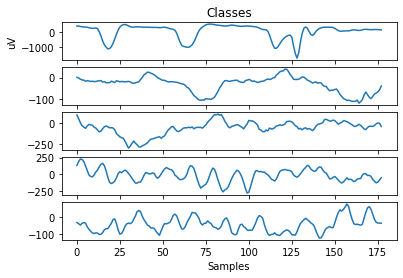

In [271]:
plt.subplot(511)
plt.plot(X[1,:])
plt.title('Classes')
plt.ylabel('uV')
plt.subplot(512)
plt.plot(X[7,:])
plt.subplot(513)
plt.plot(X[12,:])
plt.subplot(514)
plt.plot(X[0,:])
plt.subplot(515)
plt.plot(X[2,:])
plt.xlabel('Samples')

In [272]:
y = ESR.iloc[:,179].values
print("le shape de y: ", y.shape)

le shape de y:  (11500,)


To make this a binary problem, let's turn the non-seizure classes 0 while maintaining the seizure as 1.

In [273]:
y[y>1]=0
y

array([0, 1, 0, ..., 0, 0, 0])

# &#128295; Building Machine Learning Models

##  Splitting the Dataset into the Training set and Test set


In [274]:
!pip install keras

In [275]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x = scaler.transform(X)
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [276]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(f"le train size pour x: {x_train.shape}, pour y: {y_train.shape}")
print(f"le test size pour x: {x_test.shape}, pour y: {y_test.shape}")

le train size pour x: (9200, 178), pour y: (9200, 2)
le test size pour x: (2300, 178), pour y: (2300, 2)


In [277]:
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

## Feature Scaling

In [278]:
x_train = np.reshape(x_train, (x_train.shape[0],1,X.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,X.shape[1]))

In [279]:
print(f"le train size pour x: {x_train.shape}, pour y: {y_train.shape}")
print(f"le test size pour x: {x_test.shape}, pour y: {y_test.shape}")

le train size pour x: (9200, 1, 178), pour y: (9200, 2)
le test size pour x: (2300, 1, 178), pour y: (2300, 2)


In [280]:
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()

model = Sequential()
model.add(LSTM(64, input_shape=(1,178),activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dropout(0.5))
#model.add(LSTM(100,return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(50))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
from tensorflow.keras.optimizers import SGD
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             62208     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 74,690
Trainable params: 74,690
Non-trainable params: 0
_________________________________________________________________


In [281]:
"""import tensorflow as tf

x_train = tf.stack(x_train)
y_test = tf.stack(y_test)"""

'import tensorflow as tf\n\nx_train = tf.stack(x_train)\ny_test = tf.stack(y_test)'

In [282]:
history = model.fit(x_train, y_train, epochs = 100, validation_data= (x_test, y_test))
score, acc = model.evaluate(x_test, y_test)


Epoch 1/100
288/288 [==============================] - 7s 11ms/step - loss: 0.5183 - accuracy: 0.7933 - val_loss: 0.4539 - val_accuracy: 0.8035
Epoch 2/100
288/288 [==============================] - 3s 9ms/step - loss: 0.4747 - accuracy: 0.8004 - val_loss: 0.4329 - val_accuracy: 0.8039
Epoch 3/100
288/288 [==============================] - 2s 8ms/step - loss: 0.4479 - accuracy: 0.8051 - val_loss: 0.4179 - val_accuracy: 0.8048
Epoch 4/100
288/288 [==============================] - 3s 9ms/step - loss: 0.4240 - accuracy: 0.8179 - val_loss: 0.3973 - val_accuracy: 0.8187
Epoch 5/100
288/288 [==============================] - 2s 8ms/step - loss: 0.4025 - accuracy: 0.8292 - val_loss: 0.3756 - val_accuracy: 0.8413
Epoch 6/100
288/288 [==============================] - 3s 9ms/step - loss: 0.3835 - accuracy: 0.8404 - val_loss: 0.3667 - val_accuracy: 0.8461
Epoch 7/100
288/288 [==============================] - 3s 10ms/step - loss: 0.3697 - accuracy: 0.8492 - val_loss: 0.3596 - val_accuracy: 0.85

In [283]:
from sklearn.metrics import accuracy_score
pred = model.predict(x_test)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
print(expected_classes.shape)
print(predict_classes.shape)
correct = accuracy_score(expected_classes,predict_classes)
print(f"Training Accuracy: {correct}")

(2300,)
(2300,)
Training Accuracy: 0.8739130434782608


In [286]:
model.save('sentiment.h5')


In [301]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpf6mtdbgl/assets


INFO:tensorflow:Assets written to: /tmp/tmpf6mtdbgl/assets


In [302]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [303]:
c_model_name="sentiment"
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))